# Chapter: Multivariate Statistical Process Monitoring for Linear and Steady-State Processes: Part 1


# Topic: Dimensionality reduction via PCA

In [2]:
# import required packages
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

np.set_printoptions(precision=3, suppress=True)

In [3]:
# fetch data
data = pd.read_excel('proc1a.xls', skiprows = 1,usecols = 'C:AI')

# separate train data
data_train = data.iloc[0:69,]
           
# scale data
scaler = StandardScaler()
data_train_normal = scaler.fit_transform(data_train)
           
# PCA
pca = PCA()
score_train = pca.fit_transform(data_train_normal)

# confirm no correlation
corr_coef = np.corrcoef(score_train,rowvar = False)
print('Correlation matrix: \n', corr_coef[0:3,0:3]) # printing only a portion


Correlation matrix: 
 [[ 1.  0. -0.]
 [ 0.  1. -0.]
 [-0. -0.  1.]]


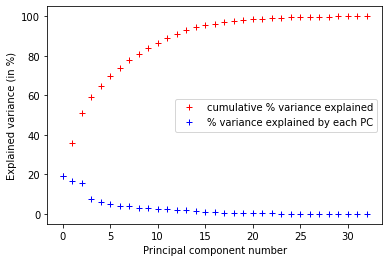

In [4]:
# visualize explained variance
import matplotlib.pyplot as plt

explained_variance = 100*pca.explained_variance_ratio_ # in percentage
cum_explained_variance = np.cumsum(explained_variance) # cumulative % variance explained

plt.figure()
plt.plot(cum_explained_variance, 'r+', label = 'cumulative % variance explained')
plt.plot(explained_variance, 'b+' , label = '% variance explained by each PC')
plt.ylabel('Explained variance (in %)')
plt.xlabel('Principal component number')
plt.legend()
plt.show()

In [5]:
# decide # of PCs to retain and compute reduced data in PC space
n_comp = np.argmax(cum_explained_variance >= 90) + 1
score_train_reduced = score_train[:,0:n_comp]

print('Number of PCs cumulatively explaining atleast 90% variance: ', n_comp)

Number of PCs cumulatively explaining atleast 90% variance:  13


In [6]:
# confirm that only about 10% of original information is lost
from sklearn.metrics import r2_score

V_matrix = pca.components_.T
P_matrix = V_matrix[:,0:n_comp] 

data_train_normal_reconstruct = np.dot(score_train_reduced, P_matrix.T)
R2_score = r2_score(data_train_normal, data_train_normal_reconstruct) 

print('% information lost = ', 100*(1-R2_score))

% information lost =  9.046972754471994


In [7]:
# alternative approach
pca = PCA(n_components = 0.9)
score_train_reduced = pca.fit_transform(data_train_normal)

data_train_normal_reconstruct = pca.inverse_transform(score_train_reduced)
R2_score = r2_score(data_train_normal, data_train_normal_reconstruct) 

print('% information lost = ', 100*(1-R2_score))

% information lost =  9.046972754471994


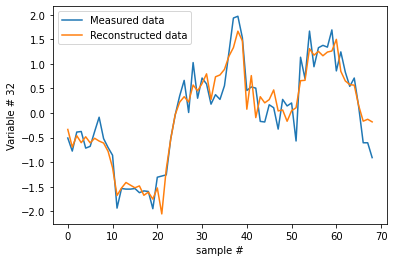

In [8]:
# plot to compare original and reconstructed variables
var = 32
plt.figure()
plt.plot(data_train_normal[:,var],label = 'Measured data')
plt.plot(data_train_normal_reconstruct[:,var],label = 'Reconstructed data')
plt.ylabel('Variable # '+ str(var))
plt.xlabel('sample #')
plt.legend()
plt.show()